## An investigation of Anscombe's quartet dataset


Anscombe's quartet serves as a reminder that descriptive statistics do not tell the whole story; indeed they might instead lead the data analyst down the wrong path. Anscombe's quartet vividly illustrates the dangers of not including data visualisation in any analysis.   


## Explain the background to the dataset



### Who is the *Ancombe* in Anscombe's quartet?

![Francis Anscombe](img/Francis_Anscombe.jpeg)

<sub>By Yale Bulletin & Calendar November 2, 2001: Volume 30, Number 9, Fair use, https://en.wikipedia.org/w/index.php?curid=23138907</sub>

Francis Anscombe was a British statistician active from the mid to late twentieth century. He worked in agricultural experimental research and was a lecturer in Cambridge before becoming the founding chairperson of the statistics department in Yale university in 1953. He researched residuals in linear regression and later, he became interested in statistical computing. He emphasised that 
>"*a computer should make both calculations and graphs*" 

(Wikipedia contributors, 2018a; Anscombe, 1973)

Anscombe created his famous *Anscombe's quartet* dataset in his 1973 article for *The American Statistician* titled *Graphs in Statistical Analysis* (Anscombe, 1973). In this article he described three types of dogma commonly experienced by statisticians.
1. Numerical calculations give right answers; graphs give approximations
2. A correct analysis of data is derived from only one set of calculations - the right ones
3. Doing the math is good; looking at the data is cheating

(Anscombe, 1973)

Anscombe stressed that the results from both calculations and graphs contribute to the analysis. Anscombe (1973) noted the benefits of visualising data.

1. It takes a holistic big picture look, allowing broad aspects of the data to emerge.  
2. It allows you to go beyond the big picture view and see what else is present when that aspect is removed.

Anscombe (1973) noted that much of statistical analysis is based on underlying assumptions that are often only *assumed* to be present in the data; Graphing the data allows the analyst to see if these assumptions are valid ones. Anscombe suggested layers of data analsyis rather than superficial surface analysis. His paper illustrated these issues with a common tool of the statistician *regression analysis*. 



## Anscombe's quartet

Mark Twain famously postulated 

>"There are three kinds of lies: lies, damned lies, and statistics". 

(Twain, 1906) 

While this may be a somewhat extreme view of statistics, Anscombe sought to illustrate the dangers of being lead down the descriptive statistics garden path. He fabricated four datasets consisting of eleven points (x,y) as listed below; 



### Libraries
#### import the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# anscombe data taken from https://web.stanford.edu/class/cs102/datasets/Anscombe.csv


#### Look at the data

### The 4 Datasets

This shows the four datasets each containing 11 x and y measurements; 
* Set I with x values X1 and y value Y1
* Set II with x values X2 and y value Y2
* Set III with x values X3 and y value Y3
* Set IV with x values X4 and y value Y4

no units are given as the sets are constructed and not actual measurements (Anscombe, 1973). 

In [2]:
# read the data
df = pd.read_csv("Anscombe.csv")
print(df, "\n")
# Look at the x values
print(df[["X1", "X2", "X3", "X4"]], "\n")
print(df[["X1", "X2", "X3", "X4"]].describe(), "\n")

    X1     Y1  X2    Y2  X3     Y3  X4     Y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89 

    X1  X2  X3  X4
0   10  10  10   8
1    8   8   8   8
2   13  13  13   8
3    9   9   9   8
4   11  11  11   8
5   14  14  14   8
6    6   6   6   8
7    4   4   4  19
8   12  12  12   8
9    7   7   7   8
10   5   5   5   8 

              X1         X2         X3         X4
count  11.000000  11.000000  11.000000  11.000000
mean    9.000000   9.000000   9.000000   9.000000
std     3.316625   3.316625   3.316625   3.316625
min     4.000000

Here you can see that all the X values bar X4 are the same, and that, all the X4 values bar one are a constant 8.
Looking at the common descriptive measures shows that all the values agree except in the ranges of the X4 value between its minimum and maximum inclusively. 

Lets take a look at the y values.

In [3]:
print(df[["Y1", "Y2", "Y3", "Y4"]],"\n")
print(df[["Y1", "Y2", "Y3", "Y4"]].describe(), "\n")


       Y1    Y2     Y3     Y4
0    8.04  9.14   7.46   6.58
1    6.95  8.14   6.77   5.76
2    7.58  8.74  12.74   7.71
3    8.81  8.77   7.11   8.84
4    8.33  9.26   7.81   8.47
5    9.96  8.10   8.84   7.04
6    7.24  6.13   6.08   5.25
7    4.26  3.10   5.39  12.50
8   10.84  9.13   8.15   5.56
9    4.82  7.26   6.42   7.91
10   5.68  4.74   5.73   6.89 

              Y1         Y2         Y3         Y4
count  11.000000  11.000000  11.000000  11.000000
mean    7.500909   7.500909   7.500000   7.500909
std     2.031568   2.031657   2.030424   2.030579
min     4.260000   3.100000   5.390000   5.250000
25%     6.315000   6.695000   6.250000   6.170000
50%     7.580000   8.140000   7.110000   7.040000
75%     8.570000   8.950000   7.980000   8.190000
max    10.840000   9.260000  12.740000  12.500000 



Here the 11 y values have a mean of 7.5 and standard deviation of 2.03; The range is between 3.1 and 12.75 with similar valued quartiles. 

In [4]:
print(df[["Y1", "Y2", "Y3", "Y4"]].describe()[4:7], "\n")

        Y1     Y2    Y3    Y4
25%  6.315  6.695  6.25  6.17
50%  7.580  8.140  7.11  7.04
75%  8.570  8.950  7.98  8.19 



### What are descriptive statistics?

There are different statistical methods used to analyse data. Descriptive statistics focus on the collection, presentation and measurement of the data, while inferential statistics look at what kind of hypothesis the data suggests (Siddharth, 2011). Descriptive statistical measures can be broadly broken down into 4 regions (Campuslabs, n.d.).

1. measures of frequency such as frequencies, percents, counts
2. measures of central tendencies, such as mean median and or mode
3. measures of spread such as range, standard deviation and variance 
4. measures of position, such ranks 

There are two types of approach in modeling data. You can look at the data, its descriptive data and use these to build a model. This is the idea behind regression analysis. The regression line when fitted is used to make predictions about inputs beyond what is sampled. Often the first misstep in data analysis is to get right to the point and make the predictions. However there is a step that should precede this, namely data exploration. Visualizing the data is a key step in exploring its characteristics.  

#### Regression Analysis

Regression analysis is a way of finding a relationship between input values and output values. For example a new employee pay scale is often based on a predictor value of their years of experience. Here the input value or x value is the years of experience and the output value or y value is the associated pay scale. 

Linear regression, the simplest form of regression analysis, involves plotting the data and a theoretical *best fit* line then working out the parameters of this line by measuring the perpendicular 'distance' between each datum and the line. The distance is calculated in such a way that data on opposite sides of the best line do not cancel each other out. This is termed the *residual* of the datum.  The best line is the one that minimizes the sum of these residuals. This technique is often used to fit a linear model to the data. Anscombe (1973) set out to show that fitting the model before looking at the data would not be the best course of action.    
 

### Anscombe's regression analysis example

Anscombe (1973) noted that the first step to analyzing data is to graph its scatter plot of x values against y values. He noted five things that could happen with the resultant scatter plot; 

1. The x and y values are on a straight line or clustered around a straight line.
2. The x and y values are curvilinear and not linear. 
3. The x and y values appear not to be related as the y values are randomly scattered.
4. Some mixture of points 1, 2 or 3.
5. Most of the points are on a line but there are a few values that are not - outliers.

If outliers are present then the next stage is to check if they are really outliers and not wrongly entered data. Then you can remove the outliers and apply regression analysis to the remaining data and possibly investigate the outliers at a later stage as they might be very informative. 

With the above points, point 1 is the typical case for which regression analysis works best; Point 2 and could have linear regression analysis applied to it but the data would need to be transformed into a straight line if that was possible via transforming the scales. Point 5 could have its outliers detected using descriptive statistics but visualising the data is faster and more intuitive way of spotting if something is 'off'. Anscombe (1973) noted that an outlier x value contributes much more to the regression coefficient than an outlier y value.  

### Visualise

Lets plot the various datasets

### Plot the interesting aspects of the dataset

### Anscombe I


#### plot the data

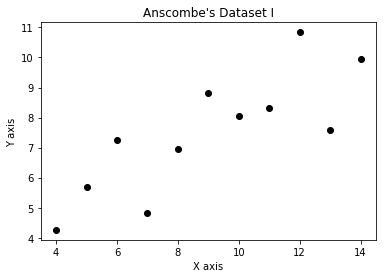

In [5]:
x1 = np.array(df['X1'])
y1 = np.array(df['Y1'])

plt.plot(x1, y1, 'ko')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset I')
plt.show()

#### Describe the graph

This shows a scatter plot. It looks like a straight line with a positive slope might be suitable to model it. This is the point 1 result Anscombe mentioned when scatterplots are used. This type of situation is ideal for regression analysis.  


#### fit a linear regression line




The linear regression line slope is 0.5 
 with the y intercept  3.0


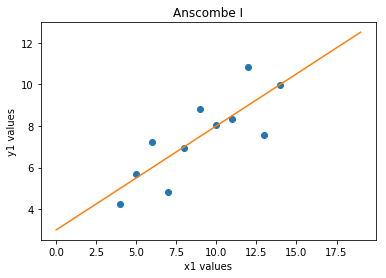

In [6]:
# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x1, y1, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x_lr1 = np.arange(0.0, 20, 1.0)
y_lr1 = m * x_lr1 + c

# Plot the Anscombe data and linear regression line
plt.plot(x1, y1, marker='o', linestyle='none')
plt.plot(x_lr1, y_lr1)

# Label the axes
plt.title("Anscombe I")
plt.xlabel('x1 values')
plt.ylabel('y1 values')

# Show the plot
plt.show()



This plot looks like a typical scatter plot with typical 'random' noise around the straight line
$$y=0.5x+3$$ 
This line was found using linear regression. The regression coefficient is the coefficient of the x value in the lines equation i.e. 0.5. 

### Anscombe II


#### plot the data

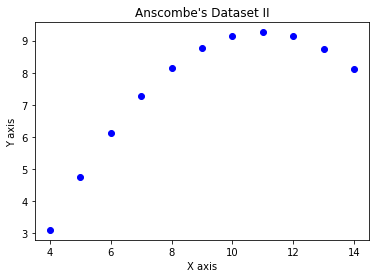

In [7]:
x2 = np.array(df['X2'])
y2 = np.array(df['Y2'])

plt.plot(x2, y2, 'bo')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset II')
plt.show()

#### Describe the graph

This shows a very clear curvature of a quadratic equation with a maximum value - it would be best modeled by an equation such as 
$$y = ax^2 + bx + c $$ with a negative $a$ value 


#### fit a linear regression line


The linear regression line that is produced with Anscombe II is exactly the same one as with Anscombe I namely, 

$y=0.5x + 3$  



The linear regression line slope is 0.5 
 with the y intercept  3.0


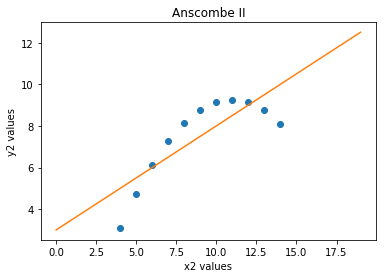

In [8]:

# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x2, y2, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x_lr2 = np.arange(0.0, 20, 1.0)
y_lr2 = m * x_lr2 + c

# Plot the Anscombe data linear regression line
plt.plot(x2, y2, marker='o', linestyle='none')
plt.plot(x_lr2, y_lr2)

# Label axes
plt.title("Anscombe II")
plt.xlabel('x2 values')
plt.ylabel('y2 values')

# Show the plot
plt.show()



However this plot is **clearly** a quadratic in this interval and **not** a straight line. Hence regression can be used but not on a  linear dimension; 

the x squared coefficient is  -0.13 
 the x coefficient is  2.8 
 the constant is  -6.0


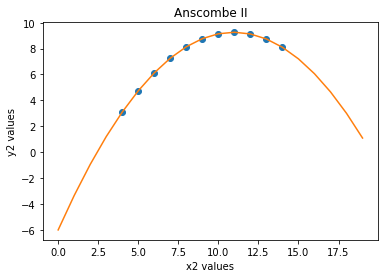

In [9]:
# see if there is a best curve

# calculate polynomial
a, b, c = np.polyfit(x2, y2, 2)
print("the x squared coefficient is ", f"{a:.2}","\n", "the x coefficient is ", f"{b:.2}", "\n", "the constant is ", f"{c:.2}")


# Plot the Anscombe data polyfit line

x_pf2 = np.arange(0.0, 20, 1.0)
y_pf2 = a * x_pf2**2 + b * x_pf2 + c

plt.plot(x2, y2, marker='o', linestyle='none')
plt.plot(x_pf2, y_pf2)

# Label axes
plt.title("Anscombe II")
plt.xlabel('x2 values')
plt.ylabel('y2 values')

# Show the plot
plt.show()



Plotting regression curvilinear line of order 2 to the data gives the plot above. This is a perfect fit to the equation $y = -0.13x^2+2.8x-6$. Drawing the scatterplot showed that fitting a linear line would not be the best course of action and that the model would be best fitted by an order of 2 curve.  

### Anscombe III


#### plot the data

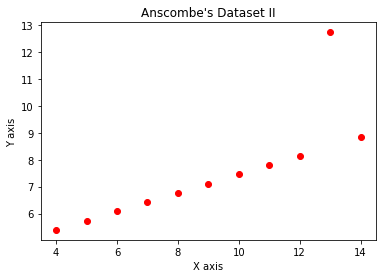

In [10]:
x3 = np.array(df['X3'])
y3 = np.array(df['Y3'])

plt.plot(x3, y3, 'ro')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset II')
plt.show()

#### Describe the graph

This shows a clear straight line but with one anomalous y value. Looking at this data again shows that the 12.74 value looks out of place with the rest of the data. 




In [11]:
print(df[["X3", "Y3"]])

    X3     Y3
0   10   7.46
1    8   6.77
2   13  12.74
3    9   7.11
4   11   7.81
5   14   8.84
6    6   6.08
7    4   5.39
8   12   8.15
9    7   6.42
10   5   5.73


If Anscombe III has a linear regression line fitted to the data without considering the anomalous y value then, the same regression line $y = 0.5x + 3$ is found with the regression coefficient of 0.5; 


The linear regression line slope is 0.5 
 with the y intercept  3.0


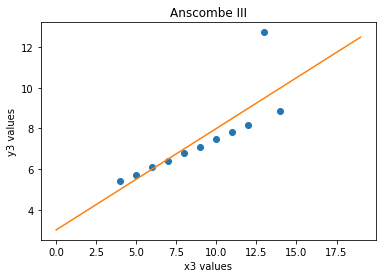

In [12]:
# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x3, y3, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x_lr3 = np.arange(0.0, 20, 1.0)
y_lr3 = m * x_lr3 + c

# Plot the Anscombe data linear regression line
plt.plot(x3, y3, marker='o', linestyle='none')
plt.plot(x_lr3, y_lr3)

# Label axes
plt.title("Anscombe III")
plt.xlabel('x3 values')
plt.ylabel('y3 values')

# Show the plot
plt.show()



However it is very clear from the graph that this would not be a suitable fit and that there is a better line if the rogue y value is removed from the dataset.

Plot a box plot to see if there are any clear outliers

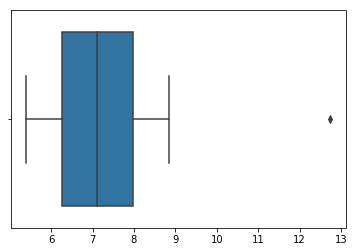

In [13]:
sns.boxplot(y3)
plt.show()


This shows that most of the y3 values are between 6 and 8; and a clear outlier between 12 and 13; This should be removed as the line is steadily increasing so averaging the Y3 values would not be suitable value to replace the 12.74; 

12.74
    X3     Y3
0   10   7.46
1    8   6.77
2   13  12.74
3    9   7.11
4   11   7.81
5   14   8.84
6    6   6.08
7    4   5.39
8   12   8.15
9    7   6.42
10   5   5.73 

    X3    Y3
0   10  7.46
1    8  6.77
3    9  7.11
4   11  7.81
5   14  8.84
6    6  6.08
7    4  5.39
8   12  8.15
9    7  6.42
10   5  5.73 



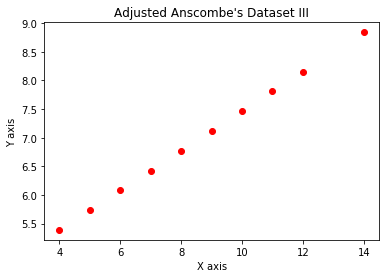

now find the best line
The linear regression line slope is 0.35 
 with the y intercept  4.0


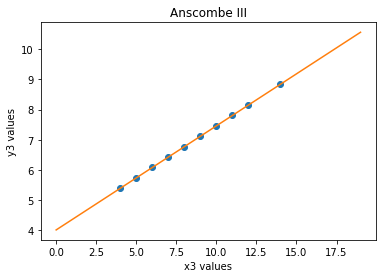

In [14]:
# print the outlier
print(df.iloc[2,5])
# print the column to check its index
print(df[["X3", "Y3"]], "\n")
# drop the row with the outlier in it
df_3 = df.drop(df.index[2])
print(df_3[["X3", "Y3"]], "\n")

# update the new arrays
x3_adj = np.array(df_3['X3'])
y3_adj = np.array(df_3['Y3'])

# plot the adjusted data
plt.plot(x3_adj, y3_adj, 'ro')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Adjusted Anscombe\'s Dataset III')
plt.show()
print("now find the best line") # its a straight line so we could just take points

# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x3_adj, y3_adj, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x_lr3_adj = np.arange(0.0, 20, 1.0)
y_lr3_adj = m * x_lr3_adj + c

# Plot the Anscombe data linear regression line
plt.plot(x3_adj, y3_adj, marker='o', linestyle='none')
plt.plot(x_lr3_adj, y_lr3_adj)

# Label axes
plt.title("Anscombe III")
plt.xlabel('x3 values')
plt.ylabel('y3 values')

# Show the plot
plt.show()


This is a perfect straight line fit to the data with the equation $y =  0.35x + 4$ with the coefficient of regression of 0.35. 

This differs from the $y = 0.5x + 3$ linear regression line produced using the full data. The line $y =  0.35x + 4$ is a better model of the data than $y = 0.5x + 3$.  

### Anscombe IV


#### plot the data

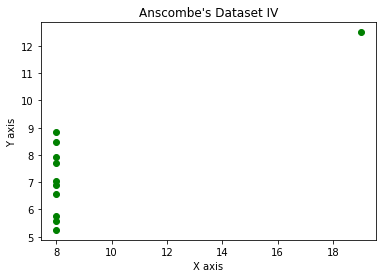

In [15]:
x4 = np.array(df['X4'])
y4 = np.array(df['Y4'])

plt.plot(x4, y4, 'go')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset IV')
plt.show()

#### Describe the graph

This shows all the data points have x value 8 except one. This illustrates Anscombe's concern that anomalous x values can have a far greater effect on the regression line than an anomalous y value as seen in Anscombe III. This rogue x value is so extreme that it likely to be an error in the data collection process rather than an outlier.

#### fit a linear regression line
If the regression line is plotted to the full dataset you get the following; 



In [16]:
# Look at the data again
print(df[["X4", "Y4"]], "\n")
print("yep its all the 8's for the x4 values bar one")

    X4     Y4
0    8   6.58
1    8   5.76
2    8   7.71
3    8   8.84
4    8   8.47
5    8   7.04
6    8   5.25
7   19  12.50
8    8   5.56
9    8   7.91
10   8   6.89 

yep its all the 8's for the x4 values bar one


The linear regression line slope is 0.5 
 with the y intercept  3.0


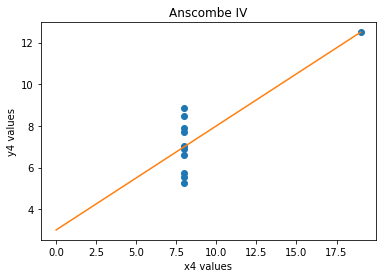

In [17]:
# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x4, y4, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x_lr4 = np.arange(0.0, 20, 1.0)
y_lr4 = m * x_lr4 + c

# Plot the Anscombe data linear regression line
plt.plot(x4, y4, marker='o', linestyle='none')
plt.plot(x_lr4, y_lr4)

# Label axes
plt.title("Anscombe IV")
plt.xlabel('x4 values')
plt.ylabel('y4 values')

# Show the plot
plt.show()



The same regression line as before is found namely, $ y = 0.5x + 3$. But this would be a very bad model for the data as it's equation is $x = 8$. 

The value at index 7 should be removed from the set. With Anscombe III the y value was an outlier but in Anscombe 4 its the x value that is out of place. 

19
    X4     Y4
0    8   6.58
1    8   5.76
2    8   7.71
3    8   8.84
4    8   8.47
5    8   7.04
6    8   5.25
7   19  12.50
8    8   5.56
9    8   7.91
10   8   6.89 

    X4    Y4
0    8  6.58
1    8  5.76
2    8  7.71
3    8  8.84
4    8  8.47
5    8  7.04
6    8  5.25
8    8  5.56
9    8  7.91
10   8  6.89 



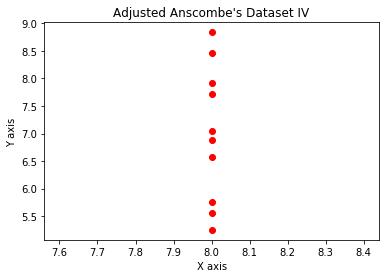

In [18]:
# print the outlier
print(df.iloc[7,6])
# print the column to check its index

print(df[["X4", "Y4"]], "\n")
# drop the row with the outlier in it
df_4 = df.drop(df.index[7])
# check its dropped
print(df_4[["X4", "Y4"]], "\n")

# update the new arrays
x4_adj = np.array(df_4['X4'])
y4_adj = np.array(df_4['Y4'])

# plot the adjusted data
plt.plot(x4_adj, y4_adj, 'ro')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Adjusted Anscombe\'s Dataset IV')
plt.show()


Indeed if the rogue x value was not there you would not be able to plot a line at all as there would be no regression coefficient. The x value would not be a predictor of the y value at all as y could be any value on the vertical line x = 8; The outlier x value creates the illusion that the data suggests the presence of a regression line.  

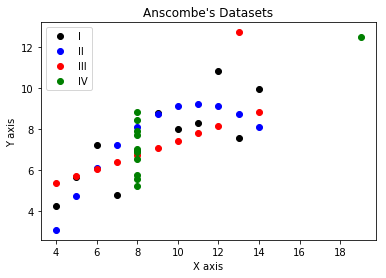

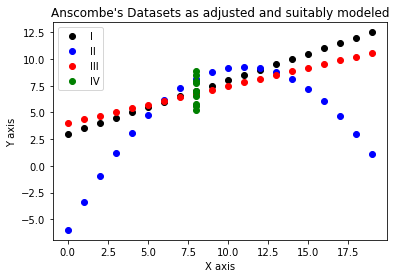

In [19]:
plt.plot(x1, y1, 'ko', label = "I")
plt.plot(x2, y2, 'bo', label = "II" )
plt.plot(x3, y3, 'ro', label = "III")
plt.plot(x4, y4, 'go', label = "IV")
plt.legend() 
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Datasets')
plt.show()
plt.plot(x_lr1, y_lr1, 'ko', label = "I")
plt.plot(x_pf2, y_pf2, 'bo', label = "II" )
plt.plot(x_lr3_adj, y_lr3_adj, 'ro', label = "III")
plt.plot(x4_adj, y4_adj, 'go', label = "IV")
plt.legend() 
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Datasets as adjusted and suitably modeled')
plt.show()

Linear regression showed each of the datasets could be modeled by the same line $y = 0.5x + 3$. However only Anscombe I was suitably  modeled by linear regression. Anscombe II was the quadratic curve $y = -0.13x^2+2.8x-6$. Anscombe III was linear but an outlier y value was not giving the best fit line and the linear regression line that was most suitable to use in this case was $y =  0.35x + 4$. Anscombe IV had a constant x value in all but one datum. When this was removed it could be suitably modeled by the vertical line $x = 8$ which would tell us nothing about y values.  

# Calculate descriptive stats

Anscombe (1973) suggested the first stage of analysis should be to explore the data; Visualisation was a good way to get a feel for the data. 
The full dataset decscriptors are below; 

In [20]:
print(df.describe())


              X1         Y1         X2         Y2         X3         Y3  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean    9.000000   7.500909   9.000000   7.500909   9.000000   7.500000   
std     3.316625   2.031568   3.316625   2.031657   3.316625   2.030424   
min     4.000000   4.260000   4.000000   3.100000   4.000000   5.390000   
25%     6.500000   6.315000   6.500000   6.695000   6.500000   6.250000   
50%     9.000000   7.580000   9.000000   8.140000   9.000000   7.110000   
75%    11.500000   8.570000  11.500000   8.950000  11.500000   7.980000   
max    14.000000  10.840000  14.000000   9.260000  14.000000  12.740000   

              X4         Y4  
count  11.000000  11.000000  
mean    9.000000   7.500909  
std     3.316625   2.030579  
min     8.000000   5.250000  
25%     8.000000   6.170000  
50%     8.000000   7.040000  
75%     8.000000   8.190000  
max    19.000000  12.500000  


These were described earlier; However the scatter plots suggest the datasets should be the following;

In [21]:
print("Anscombe I descriptive statistics \n", df[['X1','Y1']].describe(), "\n")

print("Anscombe II descriptive statistics \n", df[['X2','Y2']].describe(), "\n")

print("Anscombe III descriptive statistics adjusted \n", df_3[['X3','Y3']].describe(), "\n")

print("Anscombe IV descriptive statistics adjusted \n", df_4[['X4','Y4']].describe(), "\n")

Anscombe I descriptive statistics 
               X1         Y1
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000 

Anscombe II descriptive statistics 
               X2         Y2
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000 

Anscombe III descriptive statistics adjusted 
               X3         Y3
count  10.000000  10.000000
mean    8.600000   6.976000
std     3.204164   1.106689
min     4.000000   5.390000
25%     6.250000   6.165000
50%     8.500000   6.940000
75%    10.750000   7.722500
max    14.000000   8.840000 

Anscombe IV descriptive statistics adjusted 
          X4         Y4
count  10.0  10.000000
mean    8.0   7.001000
std

In addition the scatterplot of Anscombe II suggested a curvilinear model should be applied. 

Anscombe's datasets have the same Pearson correlation r for the relationship between their x and y values.

In [22]:
# calculate the Pearson product-moment correlation between the x and y values for each set 
print("pearsons r for Anscombe I is \n",np.corrcoef(df["X1"], df["Y1"]),"\n" )
print("pearsons r for Anscombe II is \n",np.corrcoef(df["X2"], df["Y2"]),"\n" )
print("pearsons r for Anscombe III is \n",np.corrcoef(df["X3"], df["Y3"]),"\n" )
print("pearsons r for Anscombe IV is \n",np.corrcoef(df["X4"], df["Y4"]),"\n" )

pearsons r for Anscombe I is 
 [[ 1.          0.81642052]
 [ 0.81642052  1.        ]] 

pearsons r for Anscombe II is 
 [[ 1.          0.81623651]
 [ 0.81623651  1.        ]] 

pearsons r for Anscombe III is 
 [[ 1.          0.81628674]
 [ 0.81628674  1.        ]] 

pearsons r for Anscombe IV is 
 [[ 1.          0.81652144]
 [ 0.81652144  1.        ]] 



In [23]:
# calculate the Pearson product-moment correlation between the x and y values for each set when adjustments are made
print("pearsons r for adjusted Anscombe III is \n", np.corrcoef(df_3["X3"], df_3["Y3"]),"\n" )
print("pearsons r for adjusted Anscombe IV is \n", np.corrcoef(df_4["X4"], df_4["Y4"]),"\n" )

pearsons r for adjusted Anscombe III is 
 [[ 1.          0.99999655]
 [ 0.99999655  1.        ]] 

pearsons r for adjusted Anscombe IV is 
 [[ nan  nan]
 [ nan   1.]] 



C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


This shows that the unadjusted datasets all have the same coefficient of correlation of 0.8165; This is a measure of the strength of association between the x and y value. However the adjusted Anscombe III has a higher correlation coefficient at 1 and Anscombe IV is not suitable for regression analysis. Anscombe II is also not suitable for a linear based correlation coefficient. 

## Explain why the dataset is interesting refering to the plots and statistics

Anscombe's datasets are interesting as it shows the importance of taking a big picture look at the data. Visualising the data can give pointers to the direction your calculation approach should take. 

Anscombe I dataset scatterplot showed that a linear regression approach was suitable; Why? because the data was scattered in a non uniform manner around some linear region of the plot. Linear regression showed that this data could be modelled by the line $y = 0.5x + 3$.

Anscombe II dataset scatterplot showed that a linear approach would not be a good choice; The scatterplot showed a curve and was best modeled by the equation $y = -0.13x^2+2.8x-6$. 

Anscombe III showed that an outlier y value was easy to spot and that the dataset should be adjusted before performing linear regression; This produced a best line of $y =  0.35x + 4$ for modeling the data. 

Finally Anscombe IV showed that an outlier x value should be checked carefully or else it may invalidate any regression line predictions. The adjusted Ancombe IV data was not suitable for regression analysis. 


## Speculations on how Anscombe's datasets may have been created

Anscombe's four sets show different characteristics and contain different types of errors. Rodríguez (2016) noted the different types of errors in Anscombe's datasets around the regression line $y = 0.5x +3 $.

* Pure Error

Anscombe I is what you would typically expect in real world experiments. Its a scatter plot like what you might find when measuring the lengths of petals. Measurements will all be clustered around a best line and show some 'random noise' or 'pure error' in how they deviate from the best fit line. This type of data if what is typically expected and the descriptive statistics and data visualization methods agree on how this data should be modeled.   

* Lack of Fit

Anscombe II is a quadratic curve (at least in the interval in question). These types of curves are commonly found with real world data such as the trajectory of a ball or precision engineering etc. However if a linear regression line is applied to Anscombe II data you would **not** model its relationship between its x and y value. The regression line does not fit the data. Instead it should be modeled by a quadratic curve which does fit the data. 

* Outlier

Anscombe III's third y value distorts the regression line. The rest of the data follows a clear straight line perfectly but when the third point is included it affects the regression line calculated and no longer best fits the model. 

* Undue Influence 

Anscombe IV has one x value that deviates from all the other x values. The other x values are all identical but when the 8th point is included it creates a regression line that would not there otherwise.   


Anscombe (1973) was interested in statistical computing. He noted in his 1973 paper that he often used his APL skills when plotting data. APL is a computer language specializing in multidimensional arrays (Wikipedia, 2018b). So its a fair assumption that he reverse engineered some data from the line  $y = 0.5x +3 $ with the types of error mentioned above using his computer skills.

Matejka & Fitzmaurice (2017) noted that creating data with specific descriptive statistical properties is hard. However it is relatively easy to take a set of data with specific properties and selecting certain data within this dataset then modifying them slightly while still keeping the overall statistical properties of the original dataset. 

>We do this by choosing a point at random, moving it a little bit, then checking that the statistical properties of the set haven't strayed outside of the acceptable bounds (in this particular case, we are ensuring that the means, standard deviations, and correlations remain the same to two decimal places.)
(Matejka & Fitzmaurice, 2017)

Indeed they vividly illustrated this by producing the 12 plots below which all have the same x value mean of 54.26, y value mean of 47.83, x value standard deviation of 16.76, y value standard deviation of 26.93 and correlation of -0.06. The figures below also have the same fitted linear regression line (Matejka & Fitzmaurice, 2017). 


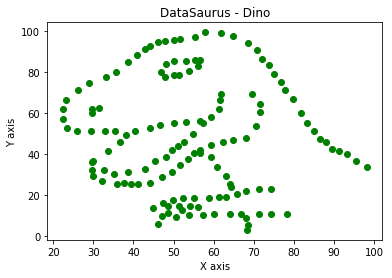

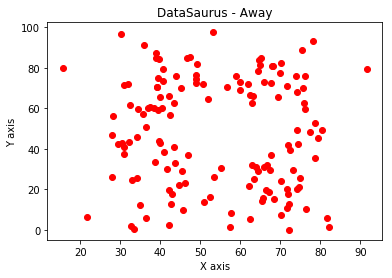

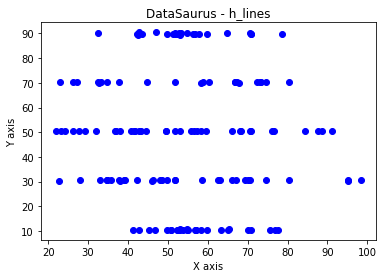

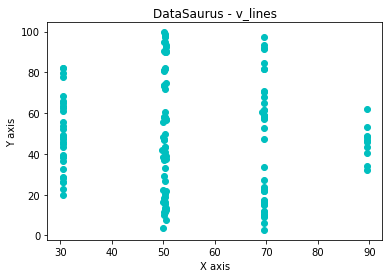

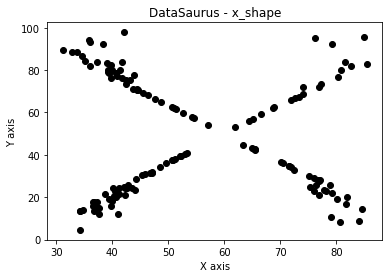

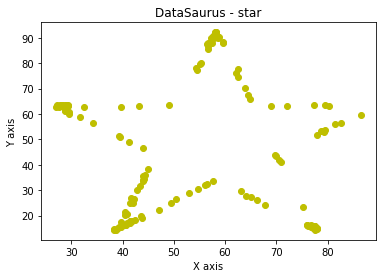

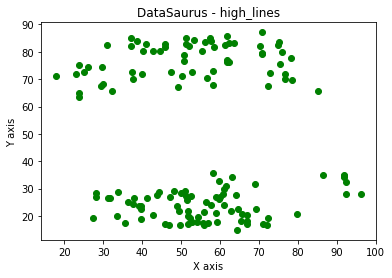

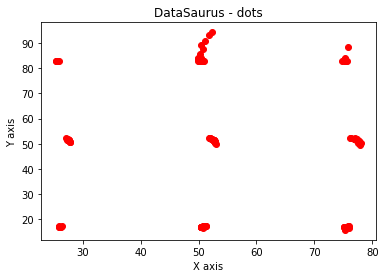

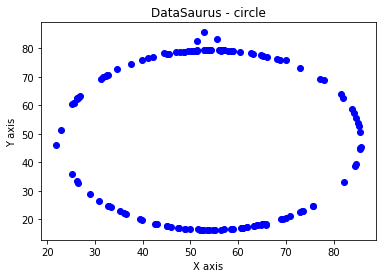

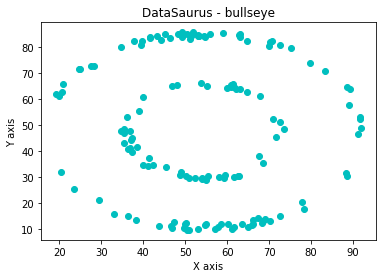

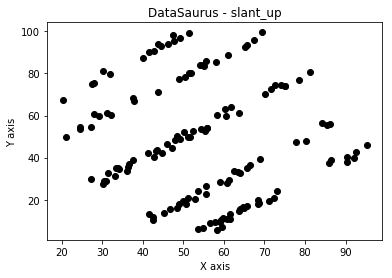

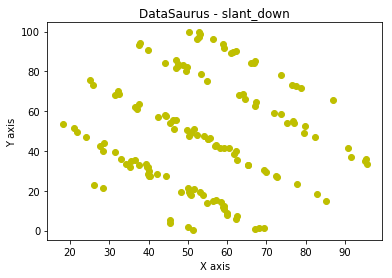

In [24]:
# got the data from https://www.autodeskresearch.com/sites/default/files/The%20Datasaurus%20Dozen.zip
# unzipped the data
# imported the DatasaurusDozen.tsv file to excel and saved it as a csv

dz = pd.read_csv("DatasaurusDozen.csv")
dz

# 1. Dino
dino_x = dz['x'].where(dz['dataset'] == 'dino')
dino_y = dz['y'].where(dz['dataset'] == 'dino')

dino_x= np.array(dino_x)
dino_y = np.array(dino_y)

# plot the scatter plot
plt.plot(dino_x, dino_y, 'go')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - Dino')
plt.show()

# 2. Away
away_x = dz['x'].where(dz['dataset'] == 'away')
away_y = dz['y'].where(dz['dataset'] == 'away')

away_x= np.array(away_x)
away_y = np.array(away_y)
# plot the scatter plot
plt.plot(away_x, away_y, 'ro')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - Away')
plt.show()

# 3. h_lines
h_lines_x = dz['x'].where(dz['dataset'] == 'h_lines')
h_lines_y = dz['y'].where(dz['dataset'] == 'h_lines')

h_lines_x = np.array(h_lines_x)
h_lines_y = np.array(h_lines_y)
# plot the scatter plot
plt.plot(h_lines_x, h_lines_y, 'bo')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - h_lines')
plt.show()

# 4. v_lines
v_lines_x = dz['x'].where(dz['dataset'] == 'v_lines')
v_lines_y = dz['y'].where(dz['dataset'] == 'v_lines')

v_lines_x = np.array(v_lines_x)
v_lines_y = np.array(v_lines_y)
# plot the scatter plot
plt.plot(v_lines_x, v_lines_y, 'co')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - v_lines')
plt.show()

# 5. x_shape

x_shape_x = dz['x'].where(dz['dataset'] == 'x_shape')
x_shape_y = dz['y'].where(dz['dataset'] == 'x_shape')

x_shape_x = np.array(x_shape_x)
x_shape_y = np.array(x_shape_y)
# plot the scatter plot
plt.plot(x_shape_x, x_shape_y, 'ko')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - x_shape')
plt.show()

# 6. star
star_x = dz['x'].where(dz['dataset'] == 'star')
star_y = dz['y'].where(dz['dataset'] == 'star')

star_x = np.array(star_x)
star_y = np.array(star_y)
# plot the scatter plot
plt.plot(star_x, star_y, 'yo')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - star')
plt.show()

# 7. high_lines

high_lines_x = dz['x'].where(dz['dataset'] == 'high_lines')
high_lines_y = dz['y'].where(dz['dataset'] == 'high_lines')

high_lines_x= np.array(high_lines_x)
high_lines_y = np.array(high_lines_y)
# plot the scatter plot
plt.plot(high_lines_x, high_lines_y, 'go')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - high_lines')
plt.show()

# 8. dots
dots_x = dz['x'].where(dz['dataset'] == 'dots')
dots_y = dz['y'].where(dz['dataset'] == 'dots')

dots_x= np.array(dots_x)
dots_y = np.array(dots_y)
# plot the scatter plot
plt.plot(dots_x, dots_y, 'ro')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - dots')
plt.show()

# 9. circle
circle_x = dz['x'].where(dz['dataset'] == 'circle')
circle_y = dz['y'].where(dz['dataset'] == 'circle')

circle_x = np.array(circle_x)
circle_y = np.array(circle_y)
# plot the scatter plot
plt.plot(circle_x, circle_y, 'bo')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - circle')
plt.show()

# 10. bullseys

bullseye_x = dz['x'].where(dz['dataset'] == 'bullseye')
bullseye_y = dz['y'].where(dz['dataset'] == 'bullseye')

bullseye_x = np.array(bullseye_x)
bullseye_y = np.array(bullseye_y)
# plot the scatter plot
plt.plot(bullseye_x, bullseye_y, 'co')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - bullseye')
plt.show()

# 11. slant_up
slant_up_x = dz['x'].where(dz['dataset'] == 'slant_up')
slant_up_y = dz['y'].where(dz['dataset'] == 'slant_up')

slant_up_x = np.array(slant_up_x)
slant_up_y = np.array(slant_up_y)
# plot the scatter plot
plt.plot(slant_up_x, slant_up_y, 'ko')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - slant_up')
plt.show()

# 12. slant_down 
slant_down_x = dz['x'].where(dz['dataset'] == 'slant_down')
slant_down_y = dz['y'].where(dz['dataset'] == 'slant_down')

slant_down_x = np.array(slant_down_x)
slant_down_y = np.array(slant_down_y)
# plot the scatter plot
plt.plot(slant_down_x, slant_down_y, 'yo')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('DataSaurus - slant_down')
plt.show()


The descriptive statistics for the DataSaurus Dozen seen below reinforce Anscombe's view of plotting the data before relying on calculations.

In [46]:
# x values
# dino
print("The descriptive statistics for the dino x values are \n", dz['x'].where(dz['dataset'] == 'dino').describe(), "\n")
# away
print("The descriptive statistics for the away x values are \n", dz['x'].where(dz['dataset'] == 'away').describe(), "\n")
# h_lines
print("The descriptive statistics for the h_lines x values are \n", dz['x'].where(dz['dataset'] == 'h_lines').describe(), "\n")
# v_lines
print("The descriptive statistics for the v_lines x values are \n", dz['x'].where(dz['dataset'] == 'v_lines').describe(), "\n")
# x_shape
print("The descriptive statistics for the x_shape x values are \n", dz['x'].where(dz['dataset'] == 'x_shape').describe(), "\n")
# star
print("The descriptive statistics for the star x values are \n", dz['x'].where(dz['dataset'] == 'star').describe(), "\n")
# high_lines
print("The descriptive statistics for the high_lines x values are \n", dz['x'].where(dz['dataset'] == 'high_lines').describe(), "\n")
# dots
print("The descriptive statistics for the dots x values are \n", dz['x'].where(dz['dataset'] == 'dots').describe(), "\n")
# circle
print("The descriptive statistics for the circle x values are \n", dz['x'].where(dz['dataset'] == 'circle').describe(), "\n")
# bullseye
print("The descriptive statistics for the bullseye x values are \n", dz['x'].where(dz['dataset'] == 'bullseye').describe(), "\n")
# slant_up
print("The descriptive statistics for the slant_up x values are \n", dz['x'].where(dz['dataset'] == 'slant_up').describe(), "\n")
# slant_down
print("The descriptive statistics for the slant_down x values are \n", dz['x'].where(dz['dataset'] == 'slant_down').describe(), "\n")

# y values
# dino
print("The descriptive statistics for the dino y values are \n", dz['y'].where(dz['dataset'] == 'dino').describe(), "\n")
# away
print("The descriptive statistics for the away y values are \n", dz['y'].where(dz['dataset'] == 'away').describe(), "\n")
# h_lines
print("The descriptive statistics for the h_lines y values are \n", dz['y'].where(dz['dataset'] == 'h_lines').describe(), "\n")
# v_lines
print("The descriptive statistics for the v_lines y values are \n", dz['y'].where(dz['dataset'] == 'v_lines').describe(), "\n")
# x_shape
print("The descriptive statistics for the x_shape y values are \n", dz['y'].where(dz['dataset'] == 'x_shape').describe(), "\n")
# star
print("The descriptive statistics for the star y values are \n", dz['y'].where(dz['dataset'] == 'star').describe(), "\n")
# high_lines
print("The descriptive statistics for the high_lines y values are \n", dz['y'].where(dz['dataset'] == 'high_lines').describe(), "\n")
# dots
print("The descriptive statistics for the dots y values are \n", dz['y'].where(dz['dataset'] == 'dots').describe(), "\n")
# circle
print("The descriptive statistics for the circle y values are \n", dz['y'].where(dz['dataset'] == 'circle').describe(), "\n")
# bullseye
print("The descriptive statistics for the bullseye y values are \n", dz['y'].where(dz['dataset'] == 'bullseye').describe(), "\n")
# slant_up
print("The descriptive statistics for the slant_up y values are \n", dz['y'].where(dz['dataset'] == 'slant_up').describe(), "\n")
# slant_down
print("The descriptive statistics for the slant_down y values are \n", dz['y'].where(dz['dataset'] == 'slant_down').describe(), "\n")


The descriptive statistics for the dino x values are 
 count    142.000000
mean      54.263273
std       16.765142
min       22.307700
25%       44.102600
50%       53.333300
75%       64.743600
max       98.205100
Name: x, dtype: float64 

The descriptive statistics for the away x values are 
 count    142.000000
mean      54.266100
std       16.769825
min       15.560750
25%       39.724115
50%       53.340296
75%       69.146597
max       91.639961
Name: x, dtype: float64 

The descriptive statistics for the h_lines x values are 
 count    142.000000
mean      54.261442
std       16.765898
min       22.003709
25%       42.293828
50%       53.069678
75%       66.768274
max       98.288123
Name: x, dtype: float64 

The descriptive statistics for the v_lines x values are 
 count    142.000000
mean      54.269927
std       16.769959
min       30.449654
25%       49.964506
50%       50.362890
75%       69.504068
max       89.504851
Name: x, dtype: float64 

The descriptive statistics for

## Conclusion

Anscombe (1973) concluded that computer programming greatly helps in plotting data; And that an advanced computer programmer could look at more complex datasets.  He noted at the at the time his paper was written 1973, there was not much overlap between data analysts working in their respective fields and those with enough computing skills to produce compelling visual data. I think Anscombe would be pleased with the rise of novice programmers and their ability to produce high quality data visualizations using python and display them using jupyter notebooks. Anscombe's quartet shows the importance of visualising the data as an exploratory  first step before jumping headlong into performing calculations and making predictive models. 



### References

Anscombe, F. J. (1973). Graphs in Statistical Analysis. The American Statistician, 27(1), 17. doi:10.2307/2682899 

Campuslabs. (n.d.). Types of Descriptive Statistics. Retrieved from https://baselinesupport.campuslabs.com/hc/en-us/articles/204305665-Types-of-Descriptive-Statistics 

Matejka, J., & Fitzmaurice, G. (2017). The Datasaurus Dozen - Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. Retrieved November 8, 2018, from https://www.autodeskresearch.com/publications/samestats CHI 2017 Conference proceedings: ACM SIGCHI Conference on Human Factors in Computing Systems
 

Rodríguez, G. (2016). Generalized Linear Models. Lecture. Retrieved November 7, 2018, from http://data.princeton.edu/wws509/stata/anscombe.html 

Siddharth Kalla (2011, August 6). Branches of Statistics. Retrieved Nov 04, 2018 from Explorable.com: https://explorable.com/branches-of-statistics

Twain, M. (1906). Chapters from my autobiography. London: Harper.

Wikipedia contributors. (2018a, October 3). Frank Anscombe. In Wikipedia, The Free Encyclopedia. Retrieved 22:18, November 6, 2018, from https://en.wikipedia.org/w/index.php?title=Frank_Anscombe&oldid=862291249

Wikipedia contributors. (2018b, October 9). APL (programming language). In Wikipedia, The Free Encyclopedia. Retrieved 16:53, November 7, 2018, from https://en.wikipedia.org/w/index.php?title=APL_(programming_language)&oldid=863284672
